# Group assignment time-series analysis

### By: Group B - Bian & Mahir

In [36]:
# Initialize libraries

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import cartopy.crs as ccrs

### 1. Open the data set on which you will do the analysis.

The data consists of daily global observations of NO2 by the OMI instrument. For information about the joint Dutch-US ozone monitoring instrument, see https://www.knmiprojects.nl/projects/ozone-monitoring-instrument or https://aura.gsfc.nasa.gov/omi.html

In [37]:
# Open multiple data files into one dataset
path = "/home/jovyan/shared/Satellites-for-GeoHealth-2023-2A/data/NO2/OMI/"
# path = "./"
flist = [path + "OMI-Aura_L3-OMNO2d_20041001-20041231.nc",
         path + "OMI-Aura_L3-OMNO2d_20050101-20051231.nc",
         path + "OMI-Aura_L3-OMNO2d_20060101-20061231.nc",
         path + "OMI-Aura_L3-OMNO2d_20070101-20071231.nc",
         path + "OMI-Aura_L3-OMNO2d_20080101-20081231.nc",
         path + "OMI-Aura_L3-OMNO2d_20090101-20091231.nc",
         path + "OMI-Aura_L3-OMNO2d_20100101-20101231.nc",
         path + "OMI-Aura_L3-OMNO2d_20110101-20111231.nc",
         path + "OMI-Aura_L3-OMNO2d_20120101-20121231.nc",
         path + "OMI-Aura_L3-OMNO2d_20130101-20131231.nc",
         path + "OMI-Aura_L3-OMNO2d_20140101-20141231.nc",
         path + "OMI-Aura_L3-OMNO2d_20150101-20151231.nc",
         path + "OMI-Aura_L3-OMNO2d_20160101-20161231.nc",
         path + "OMI-Aura_L3-OMNO2d_20170101-20171231.nc",
         path + "OMI-Aura_L3-OMNO2d_20180101-20181231.nc",
         path + "OMI-Aura_L3-OMNO2d_20190101-20191231.nc",
         path + "OMI-Aura_L3-OMNO2d_20200101-20201231.nc",
         path + "OMI-Aura_L3-OMNO2d_20210101-20211231.nc",
         path + "OMI-Aura_L3-OMNO2d_20220101-20221231.nc",
         path + "OMI-Aura_L3-OMNO2d_20230101-20231231.nc",
         path + "OMI-Aura_L3-OMNO2d_20240101-20240114.nc"]         
         

ds = xr.open_mfdataset(flist)
ds

<xarray.Dataset>
Dimensions:                           (time: 7006, latitude: 720,
                                       longitude: 1440)
Coordinates:
  * time                              (time) datetime64[ns] 2004-10-01 ... 20...
  * latitude                          (latitude) float64 -89.88 -89.62 ... 89.88
  * longitude                         (longitude) float64 -179.9 ... 179.9
Data variables:
    ColumnAmountNO2Trop               (time, latitude, longitude) float32 dask.array<chunksize=(79, 720, 1440), meta=np.ndarray>
    ColumnAmountNO2TropCloudScreened  (time, latitude, longitude) float32 dask.array<chunksize=(79, 720, 1440), meta=np.ndarray>

### 1. a. Make a global map of the long-term mean NO2 concentration (whole data series).

Use the ColumnAmountNO2Trop (mean NO2 concentration in the troposphere) variable.

In [38]:
long_term_mean = ds["ColumnAmountNO2Trop"].mean('time')

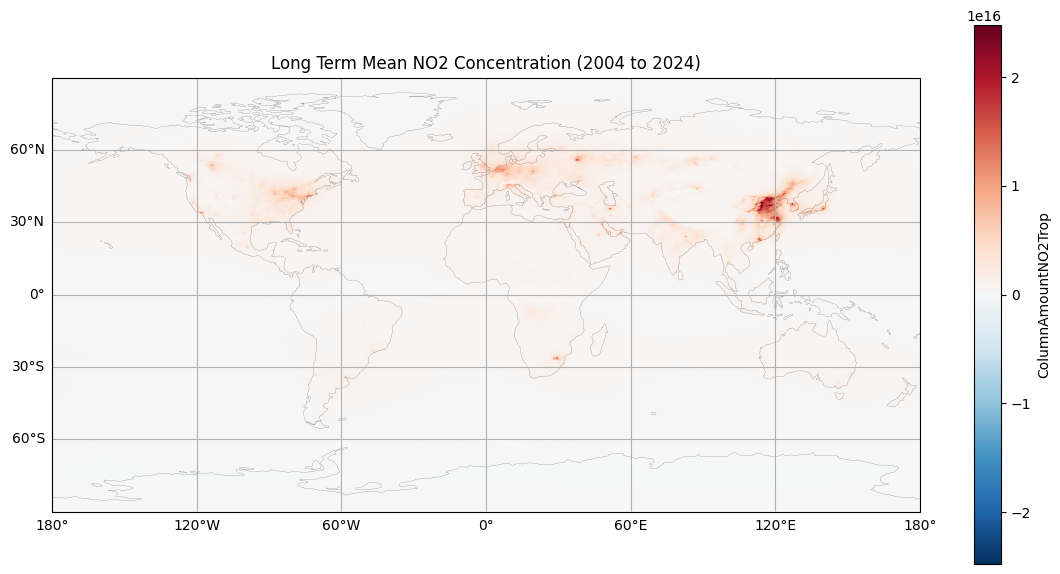

In [39]:
plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
long_term_mean.plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.set_title('Long Term Mean NO2 Concentration (2004 to 2024)')
Layout = ax.gridlines(draw_labels=True)
Layout.right_labels = False
Layout.top_labels = False

### 1.b. Make global maps of the mean yearly anomalies for 2005, 2010, 2015, and 2020

In [40]:
years = [2005, 2010, 2015, 2020]

# Calculate the mean yearly anomalies for each year
mean_yearly_anomalies = {}

for year in years:
    # Select data for the specific year
    year_data = ds.sel(time=str(year))
    # Calculate the mean for the year
    mean_year = year_data.mean(dim='time')
    # Calculate the anomaly by subtracting the long-term mean
    anomaly = mean_year - long_term_mean
    mean_yearly_anomalies[year] = anomaly
mean_yearly_anomalies

{2005: <xarray.Dataset>
 Dimensions:                           (latitude: 720, longitude: 1440)
 Coordinates:
   * latitude                          (latitude) float64 -89.88 -89.62 ... 89.88
   * longitude                         (longitude) float64 -179.9 ... 179.9
 Data variables:
     ColumnAmountNO2Trop               (latitude, longitude) float32 dask.array<chunksize=(720, 1440), meta=np.ndarray>
     ColumnAmountNO2TropCloudScreened  (latitude, longitude) float32 dask.array<chunksize=(720, 1440), meta=np.ndarray>,
 2010: <xarray.Dataset>
 Dimensions:                           (latitude: 720, longitude: 1440)
 Coordinates:
   * latitude                          (latitude) float64 -89.88 -89.62 ... 89.88
   * longitude                         (longitude) float64 -179.9 ... 179.9
 Data variables:
     ColumnAmountNO2Trop               (latitude, longitude) float32 dask.array<chunksize=(720, 1440), meta=np.ndarray>
     ColumnAmountNO2TropCloudScreened  (latitude, longitude) float32 

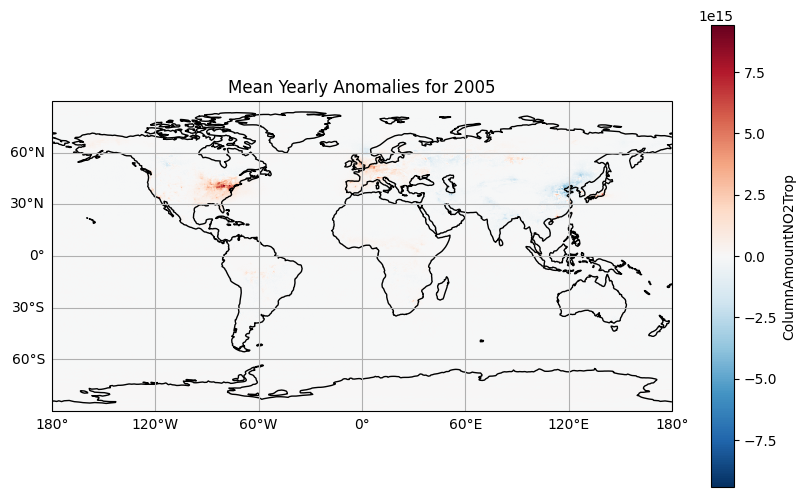

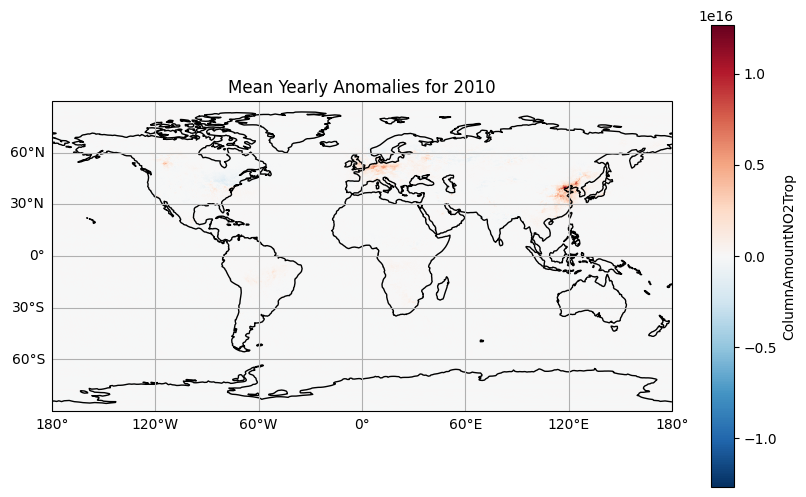

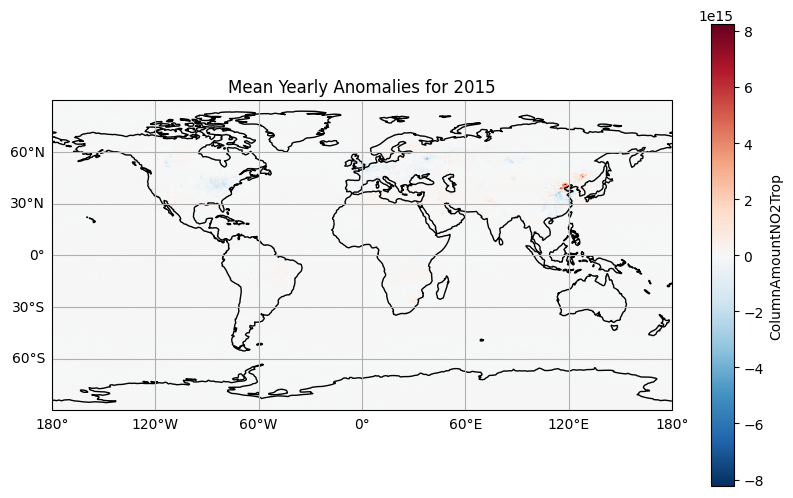

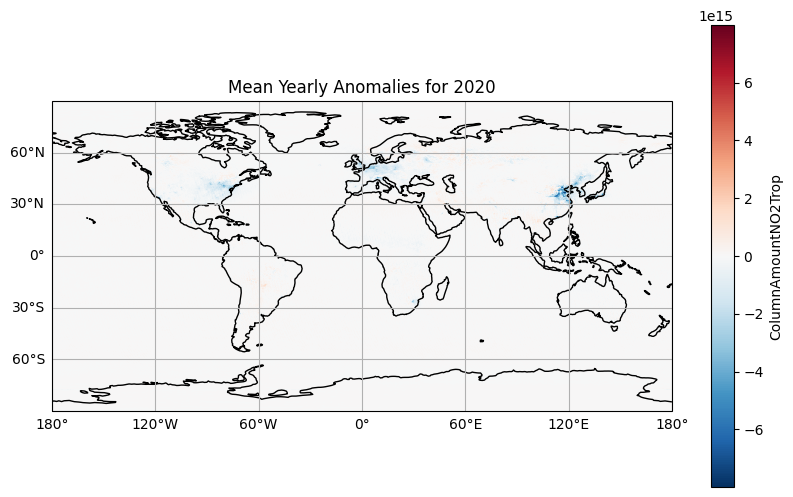

In [41]:
# Plot global maps for each year
for year in mean_yearly_anomalies:
    plt.figure(figsize=(10, 6))
    
    ax = plt.axes(projection=ccrs.PlateCarree())
    mean_yearly_anomalies[year]['ColumnAmountNO2Trop'].plot(ax=ax, transform=ccrs.PlateCarree())
    ax.coastlines()
    
    gl = ax.gridlines(draw_labels=True)
    gl.left_labels = True
    gl.bottom_labels = True
    gl.top_labels = False
    gl.right_labels = False
    ax.set_title(f"Mean Yearly Anomalies for {year}")
    plt.show()

### 2. Plot time series of daily NO2 data for (a) Enschede; (b) New Delhi; (c) Nairobi; (d) Houston; (e) Beijing

In [42]:
# Coordinates of cities
coords_En = {'latitude': 52.2, 'longitude': 6.9}
coords_ND = {'latitude': 6.53, 'longitude': 77.22}
coords_Na = {'latitude': -1.29, 'longitude': 36.82}
coords_Ho = {'latitude': 29.75, 'longitude': -95.36}
coords_Be = {'latitude': 39.90, 'longitude': 116.41}

In [43]:
DataAraay_Enschede = ds.sel(coords_En, method= "nearest" )["ColumnAmountNO2Trop"]
DataAraay_Delhi = ds.sel(coords_ND, method= "nearest" )["ColumnAmountNO2Trop"]
DataAraay_Nairobi = ds.sel(coords_Na, method= "nearest" )["ColumnAmountNO2Trop"]
DataAraay_Houston = ds.sel(coords_Ho, method= "nearest" )["ColumnAmountNO2Trop"]
DataAraay_Beijing = ds.sel(coords_Be, method= "nearest" )["ColumnAmountNO2Trop"]

In [44]:
DataAraays = [DataAraay_Enschede, DataAraay_Delhi, DataAraay_Nairobi, DataAraay_Houston, DataAraay_Beijing]
Cities = ["Enschede", "Delhi", "Nairobi", "Houston", "Beijing"]

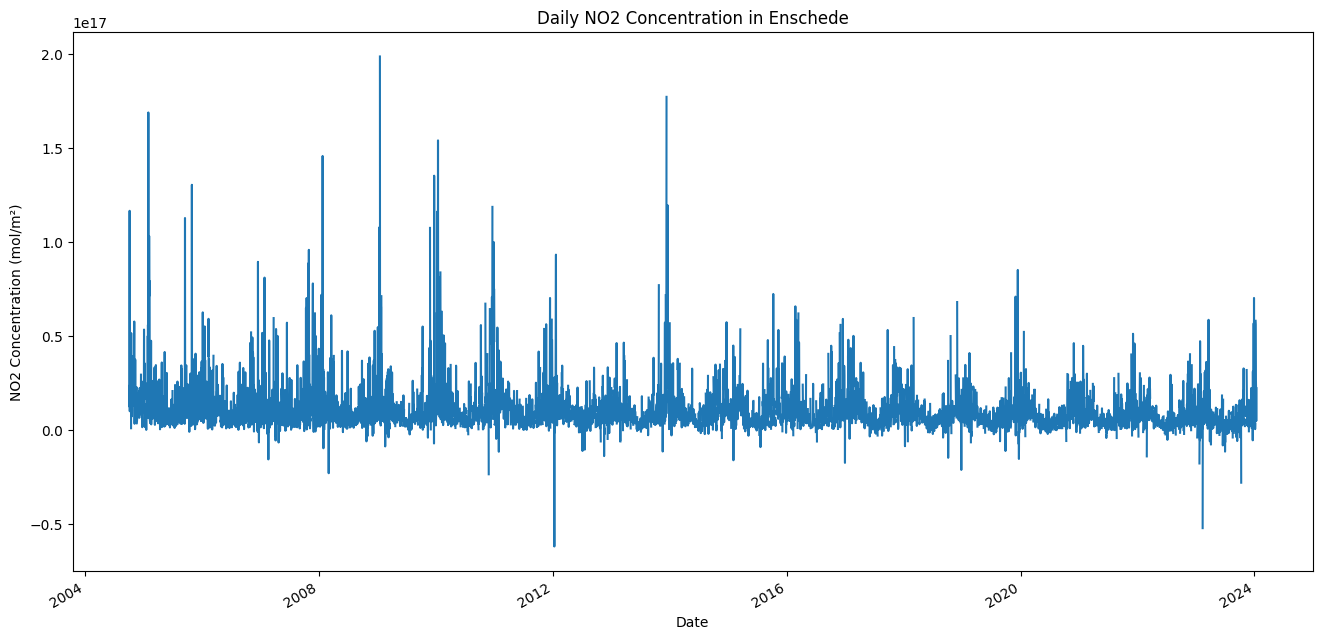

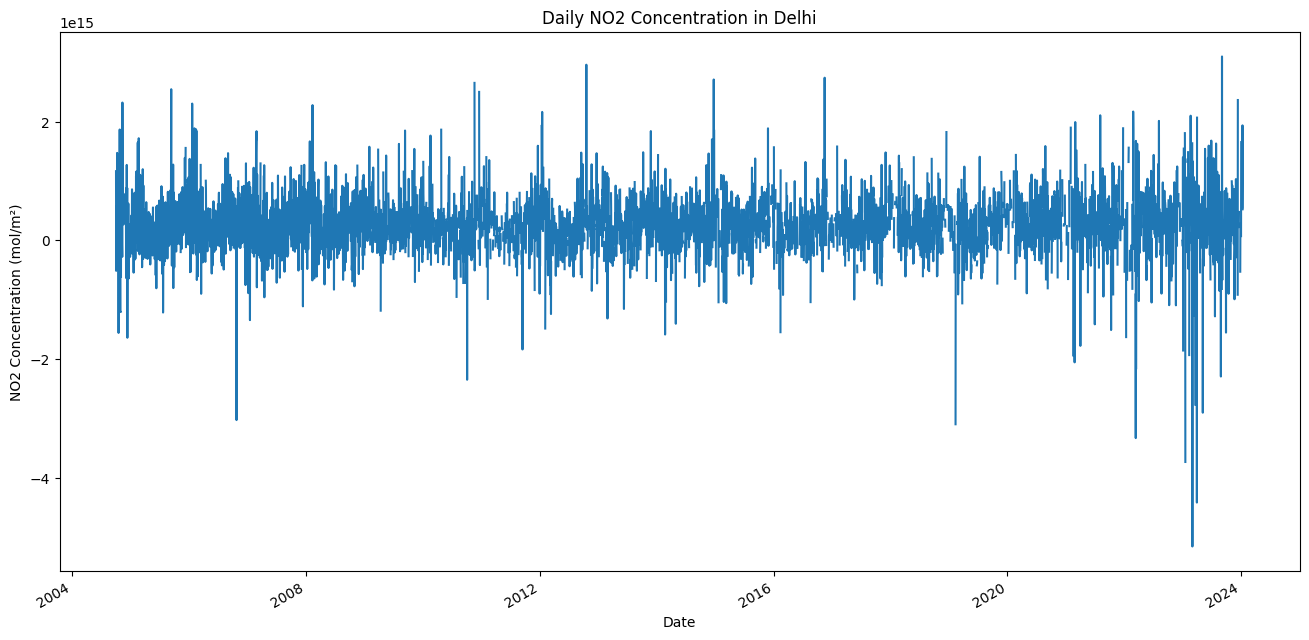

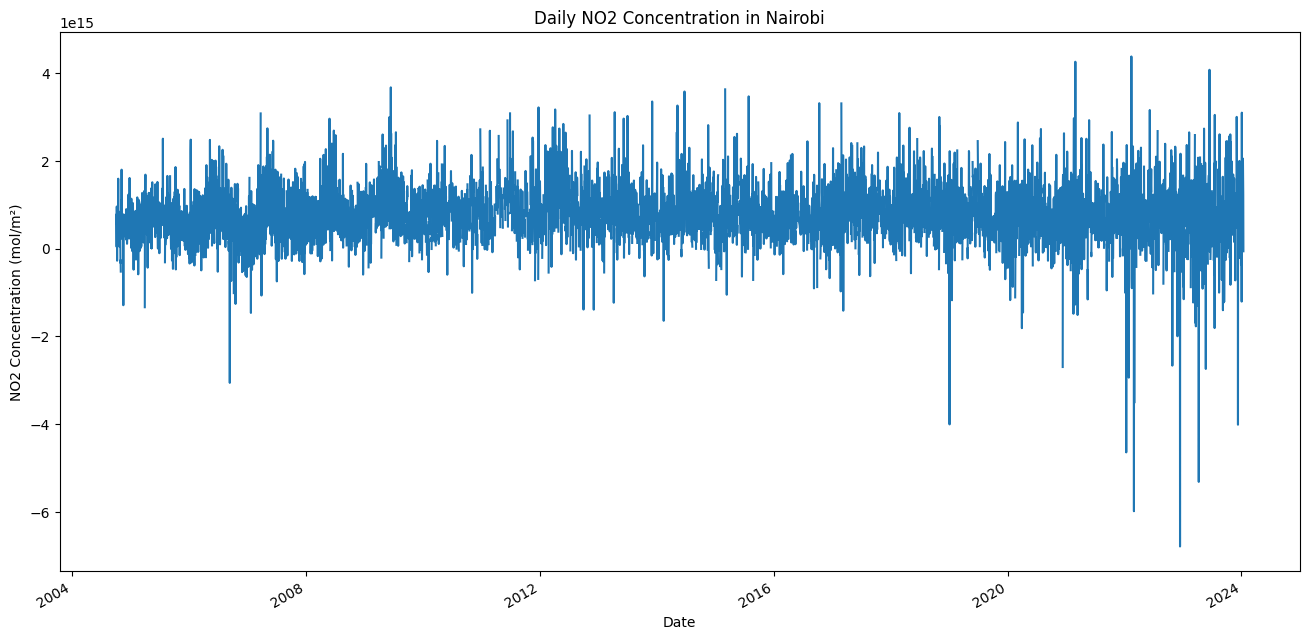

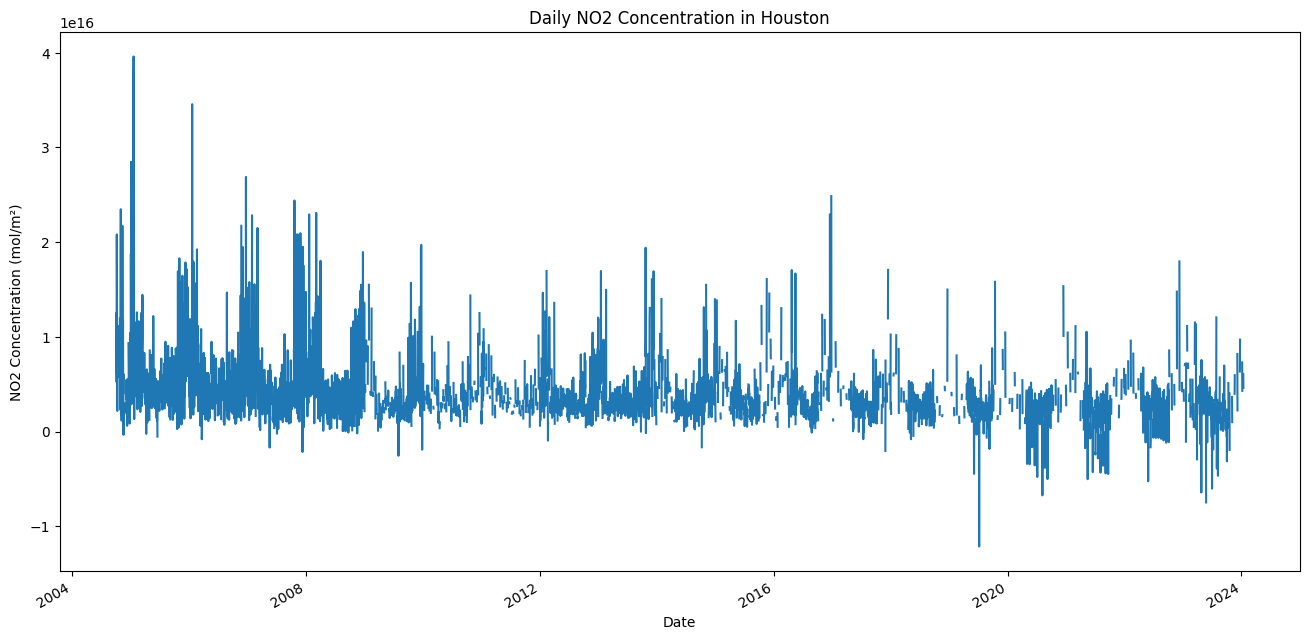

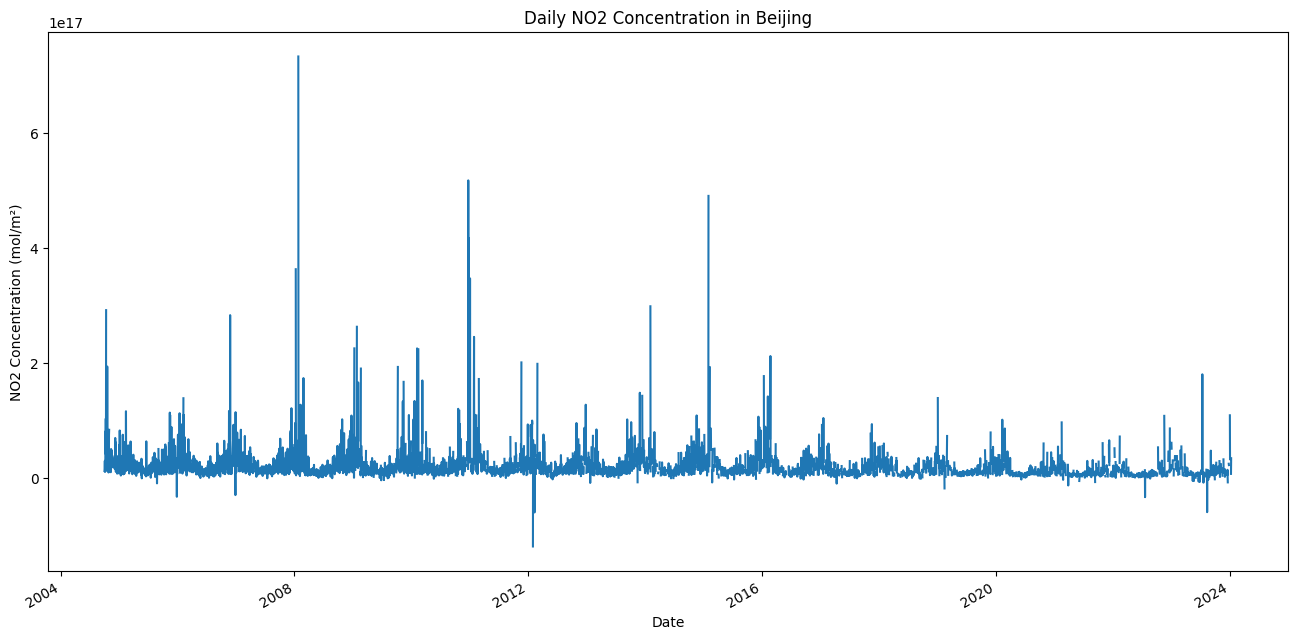

In [45]:
for i in range(len(Cities)):
    plt.figure(figsize=(16,7))

    DataAraays[i].plot()
    title = 'Daily NO2 Concentration in ' + Cities[i]
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('NO2 Concentration (mol/m²)')
    plt.show()

### 3. Perform a time series analysis using the statsmodels library of daily NO2 data for (a) Enschede; (b) New Delhi; (c) Nairobi; (d) Houston; (e) Beijing

Investigate the trend, seasonal cycle, and outliers

### (a) Enschede

In [46]:
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]

In [47]:
Dates = DataAraay_Enschede.time.to_numpy()
no2data = DataAraay_Enschede.to_numpy()

nans, x= nan_helper(no2data)
no2data[nans]= np.interp(x(nans), x(~nans), no2data[~nans])

df = pd.DataFrame({'Time': Dates, 'No2': no2data})
df.set_index("Time", inplace=True)

In [48]:
df = pd.DataFrame({'Time': Dates, 'No2': no2data})
df.set_index("Time", inplace=True)

missing_values = df.isna().sum()
missing_values

No2    0
dtype: int64

Text(0.5, 0.98, 'Timeseries Decomposed Elements for Enschede')

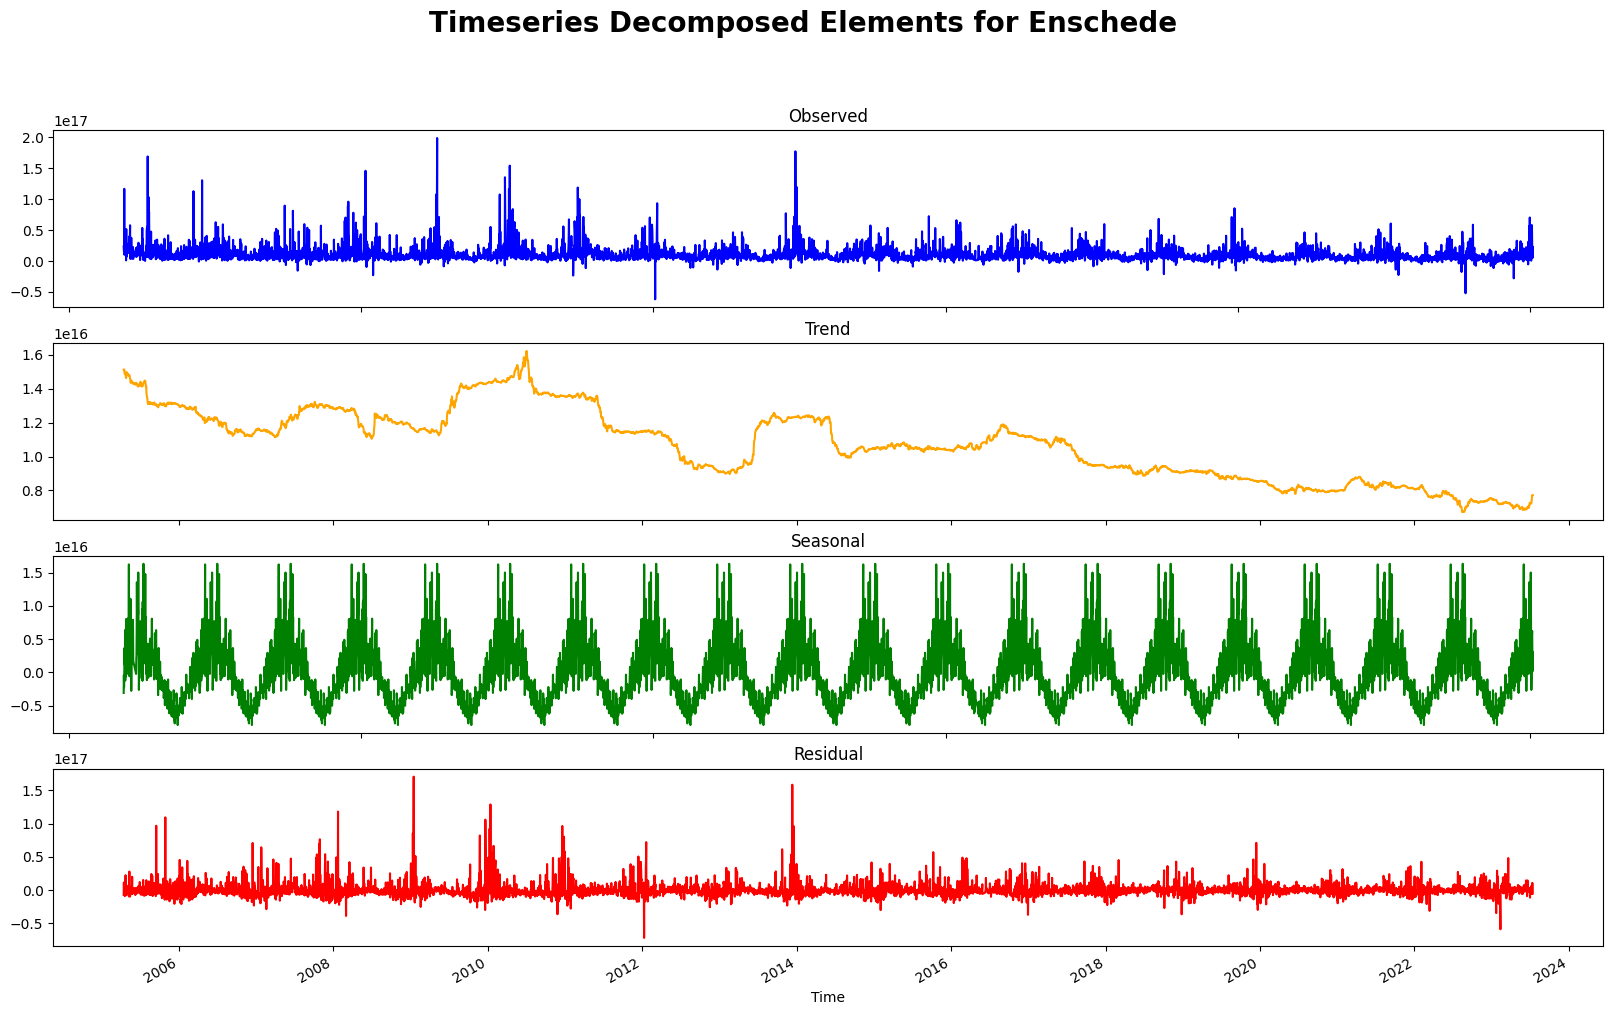

In [49]:
result = seasonal_decompose(df, model='additive', period=365)

# Plot the decomposed components separately
plt.figure(figsize=(20, 12))

# Observed
plt.subplot(411)
result.observed.plot(label='Observed', color='blue')
plt.gca().set_xticklabels([])
plt.xlabel(None)
plt.title('Observed')

# Trend
plt.subplot(412)
result.trend.plot(label='Trend', color='orange')
plt.gca().set_xticklabels([])
plt.xlabel(None)
plt.title('Trend')

# Seasonal
plt.subplot(413)
result.seasonal.plot(label='Seasonal', color='green')
plt.gca().set_xticklabels([])
plt.xlabel(None)
plt.title('Seasonal')

# Residual
plt.subplot(414)
result.resid.plot(label='Residual', color='red')
plt.title('Residual')

# Title
plt.suptitle('Timeseries Decomposed Elements for Enschede', fontsize=20, fontweight='bold')

### (b) Delhi

In [50]:
Dates = DataAraay_Delhi.time.to_numpy()
no2data = DataAraay_Delhi.to_numpy()

nans, x= nan_helper(no2data)
no2data[nans]= np.interp(x(nans), x(~nans), no2data[~nans])

df = pd.DataFrame({'Time': Dates, 'No2': no2data})
df.set_index("Time", inplace=True)

# missing_values = df.isna().sum()
# missing_values

Text(0.5, 0.98, 'Timeseries Decomposed Elements for Delhi')

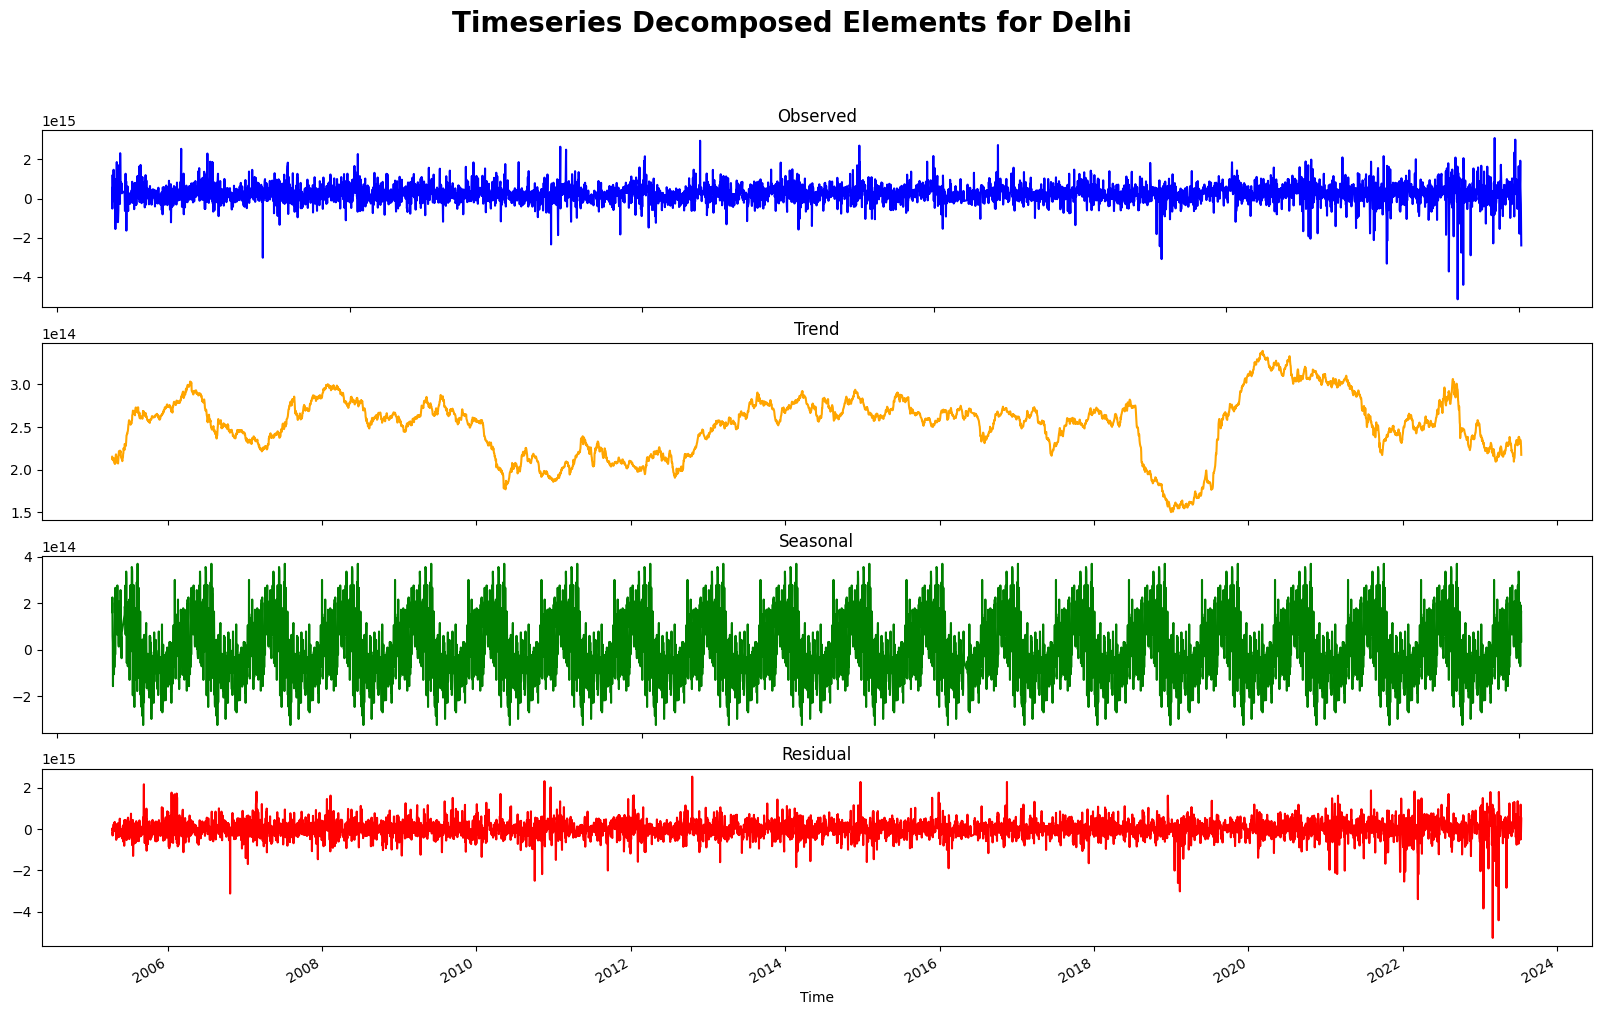

In [51]:
result = seasonal_decompose(df, model='additive', period=365)

# Plot the decomposed components separately
plt.figure(figsize=(20, 12))

# Observed
plt.subplot(411)
result.observed.plot(label='Observed', color='blue')
plt.gca().set_xticklabels([])
plt.xlabel(None)
plt.title('Observed')

# Trend
plt.subplot(412)
result.trend.plot(label='Trend', color='orange')
plt.gca().set_xticklabels([])
plt.xlabel(None)
plt.title('Trend')

# Seasonal
plt.subplot(413)
result.seasonal.plot(label='Seasonal', color='green')
plt.gca().set_xticklabels([])
plt.xlabel(None)
plt.title('Seasonal')

# Residual
plt.subplot(414)
result.resid.plot(label='Residual', color='red')
plt.title('Residual')

plt.suptitle('Timeseries Decomposed Elements for Delhi', fontsize=20, fontweight='bold')

### (c) Nairobi

In [52]:
Dates = DataAraay_Nairobi.time.to_numpy()
no2data = DataAraay_Nairobi.to_numpy()

nans, x= nan_helper(no2data)
no2data[nans]= np.interp(x(nans), x(~nans), no2data[~nans])

df = pd.DataFrame({'Time': Dates, 'No2': no2data})
df.set_index("Time", inplace=True)

# missing_values = df.isna().sum()
# missing_values

Text(0.5, 0.98, 'Timeseries Decomposed Elements for Nairobi')

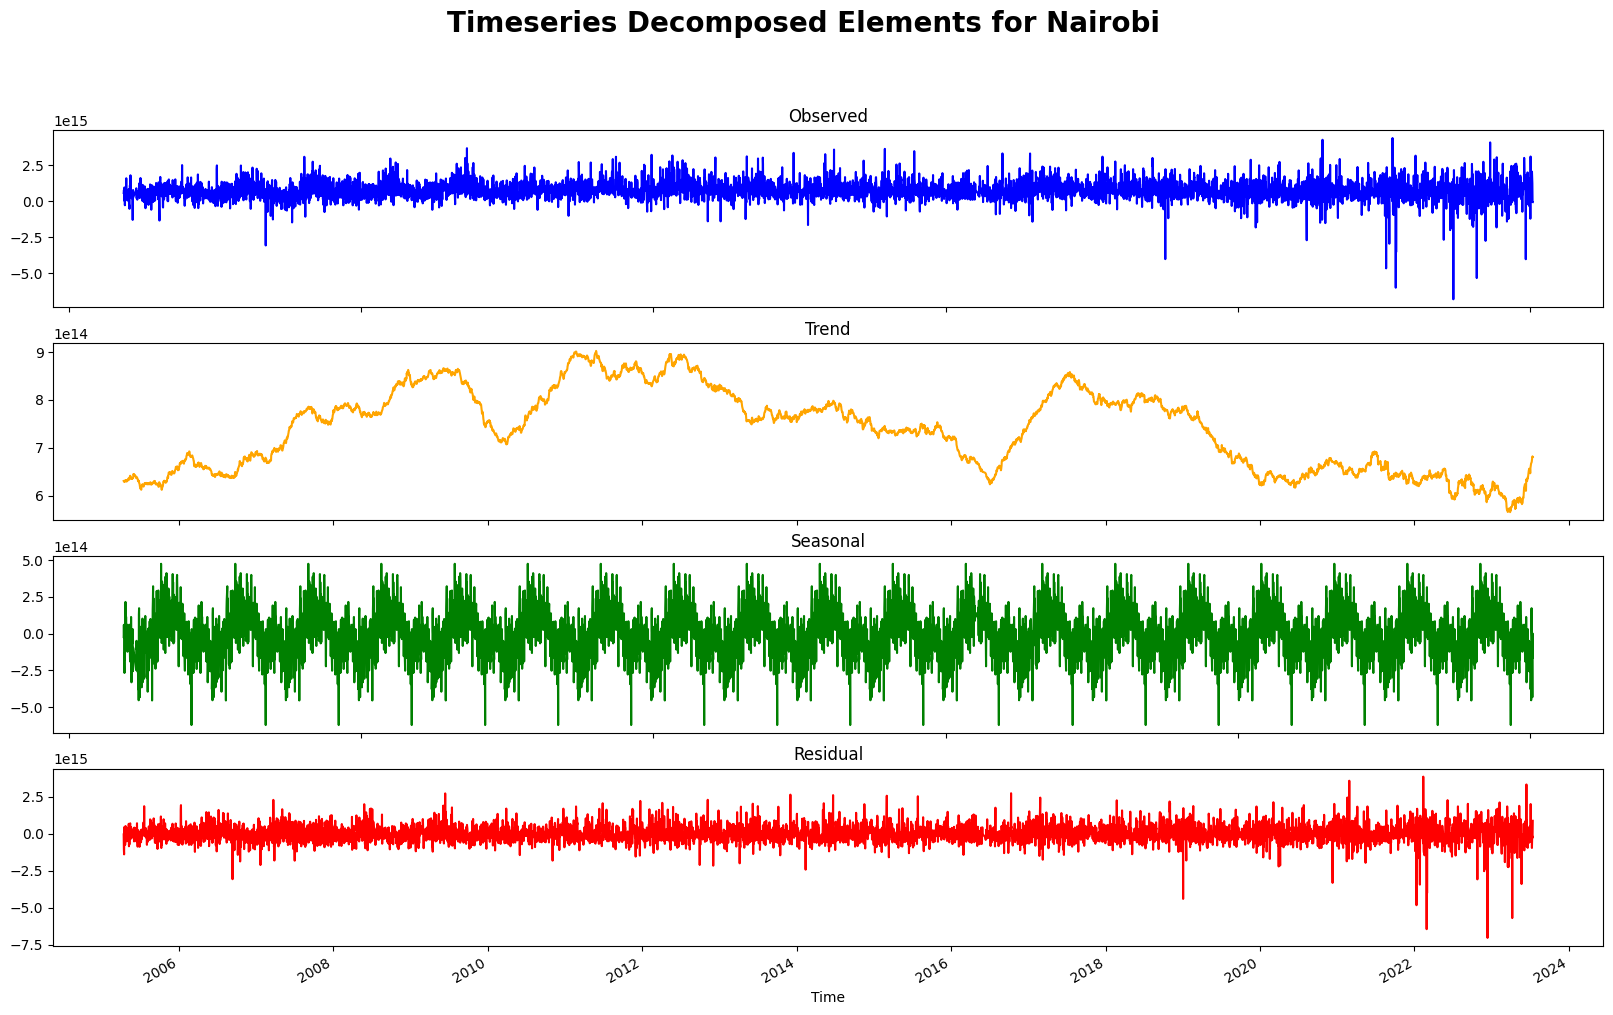

In [53]:
result = seasonal_decompose(df, model='additive', period=365)

# Plot the decomposed components separately
plt.figure(figsize=(20, 12))

# Observed
plt.subplot(411)
result.observed.plot(label='Observed', color='blue')
plt.gca().set_xticklabels([])
plt.xlabel(None)
plt.title('Observed')

# Trend
plt.subplot(412)
result.trend.plot(label='Trend', color='orange')
plt.gca().set_xticklabels([])
plt.xlabel(None)
plt.title('Trend')

# Seasonal
plt.subplot(413)
result.seasonal.plot(label='Seasonal', color='green')
plt.gca().set_xticklabels([])
plt.xlabel(None)
plt.title('Seasonal')

# Residual
plt.subplot(414)
result.resid.plot(label='Residual', color='red')
plt.title('Residual')

plt.suptitle('Timeseries Decomposed Elements for Nairobi', fontsize=20, fontweight='bold')

### (d) Houston

In [54]:
Dates = DataAraay_Houston.time.to_numpy()
no2data = DataAraay_Houston.to_numpy()

nans, x= nan_helper(no2data)
no2data[nans]= np.interp(x(nans), x(~nans), no2data[~nans])

df = pd.DataFrame({'Time': Dates, 'No2': no2data})
df.set_index("Time", inplace=True)

Text(0.5, 0.98, 'Timeseries Decomposed Elements for Houston')

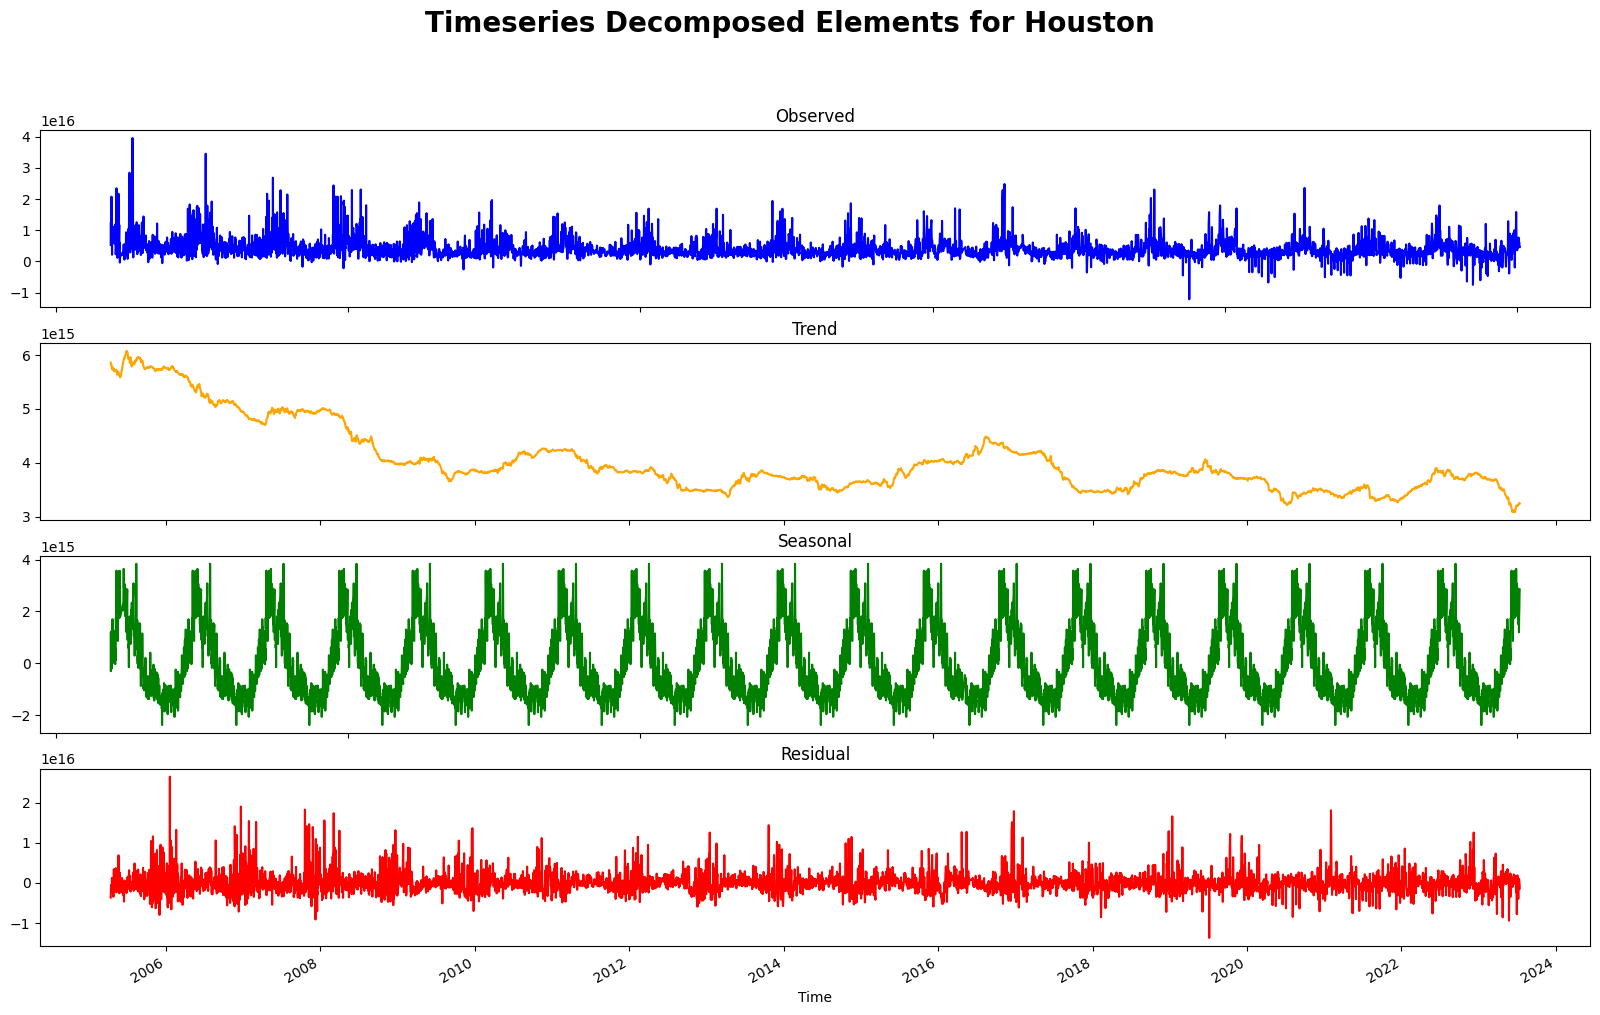

In [55]:
result = seasonal_decompose(df, model='additive', period=365)

# Plot the decomposed components separately
plt.figure(figsize=(20, 12))

# Observed
plt.subplot(411)
result.observed.plot(label='Observed', color='blue')
plt.gca().set_xticklabels([])
plt.xlabel(None)
plt.title('Observed')

# Trend
plt.subplot(412)
result.trend.plot(label='Trend', color='orange')
plt.gca().set_xticklabels([])
plt.xlabel(None)
plt.title('Trend')

# Seasonal
plt.subplot(413)
result.seasonal.plot(label='Seasonal', color='green')
plt.gca().set_xticklabels([])
plt.xlabel(None)
plt.title('Seasonal')

# Residual
plt.subplot(414)
result.resid.plot(label='Residual', color='red')
plt.title('Residual')

plt.suptitle('Timeseries Decomposed Elements for Houston', fontsize=20, fontweight='bold')

### (e) Beijing

In [56]:
Dates = DataAraay_Beijing.time.to_numpy()
no2data = DataAraay_Beijing.to_numpy()

nans, x= nan_helper(no2data)
no2data[nans]= np.interp(x(nans), x(~nans), no2data[~nans])

df = pd.DataFrame({'Time': Dates, 'No2': no2data})
df.set_index("Time", inplace=True)

Text(0.5, 0.98, 'Timeseries Decomposed Elements for Beijing')

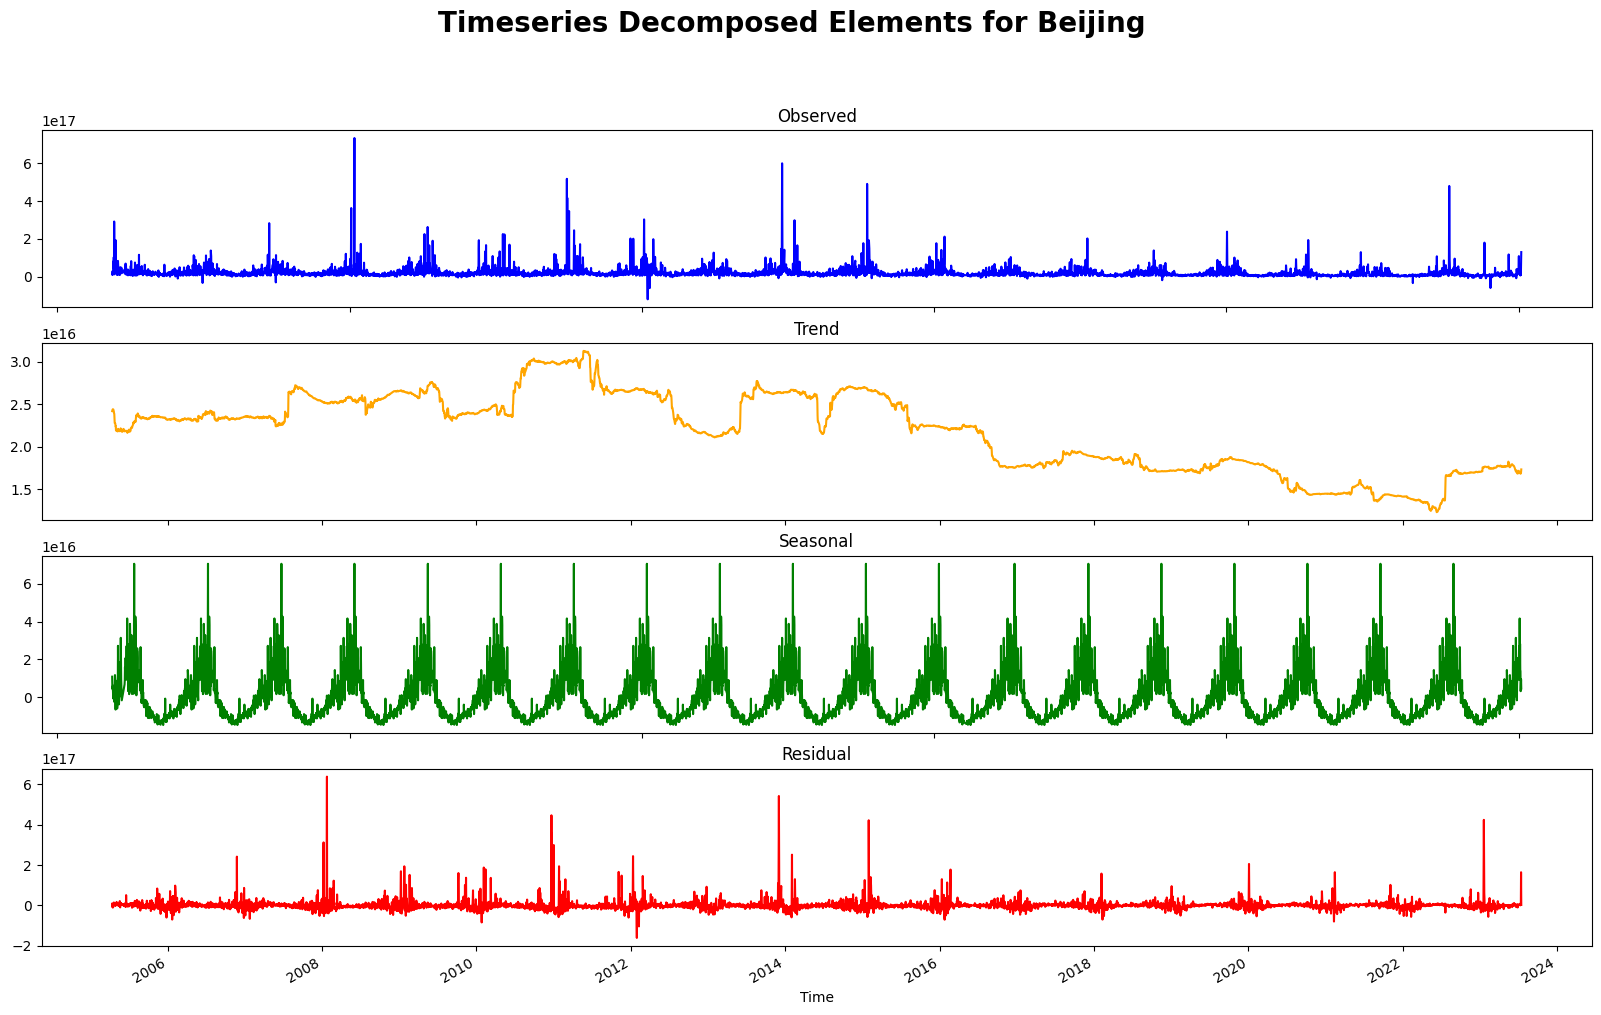

In [57]:
result = seasonal_decompose(df, model='additive', period=365)

# Plot the decomposed components separately
plt.figure(figsize=(20, 12))

# Observed
plt.subplot(411)
result.observed.plot(label='Observed', color='blue')
plt.gca().set_xticklabels([])
plt.xlabel(None)
plt.title('Observed')

# Trend
plt.subplot(412)
result.trend.plot(label='Trend', color='orange')
plt.gca().set_xticklabels([])
plt.xlabel(None)
plt.title('Trend')

# Seasonal
plt.subplot(413)
result.seasonal.plot(label='Seasonal', color='green')
plt.gca().set_xticklabels([])
plt.xlabel(None)
plt.title('Seasonal')

# Residual
plt.subplot(414)
result.resid.plot(label='Residual', color='red')
plt.title('Residual')

plt.suptitle('Timeseries Decomposed Elements for Beijing', fontsize=20, fontweight='bold')

### 4. Use xarray to investigate the weekly cycle of NO2 for a) Enschede; (b) New Delhi; (c) Nairobi; (d) Houston; (e) Beijing

In [58]:
DataAraays = [DataAraay_Enschede, DataAraay_Delhi, DataAraay_Nairobi, DataAraay_Houston, DataAraay_Beijing]
Cities = ["Enschede", "Delhi", "Nairobi", "Houston", "Beijing"]

In [59]:
DataAraay_Enschede_weekly = DataAraay_Enschede.groupby('time.weekday').mean("time")
DataAraay_Delhi_weekly = DataAraay_Delhi.groupby('time.weekday').mean("time")
DataAraay_Nairobi_weekly = DataAraay_Nairobi.groupby('time.weekday').mean("time")
DataAraay_Houston_weekly = DataAraay_Houston.groupby('time.weekday').mean("time")
DataAraay_Beijing_weekly = DataAraay_Beijing.groupby('time.weekday').mean("time")

DataAraay_weekly = [DataAraay_Enschede_weekly, DataAraay_Delhi_weekly, DataAraay_Nairobi_weekly, DataAraay_Houston_weekly, DataAraay_Beijing_weekly]

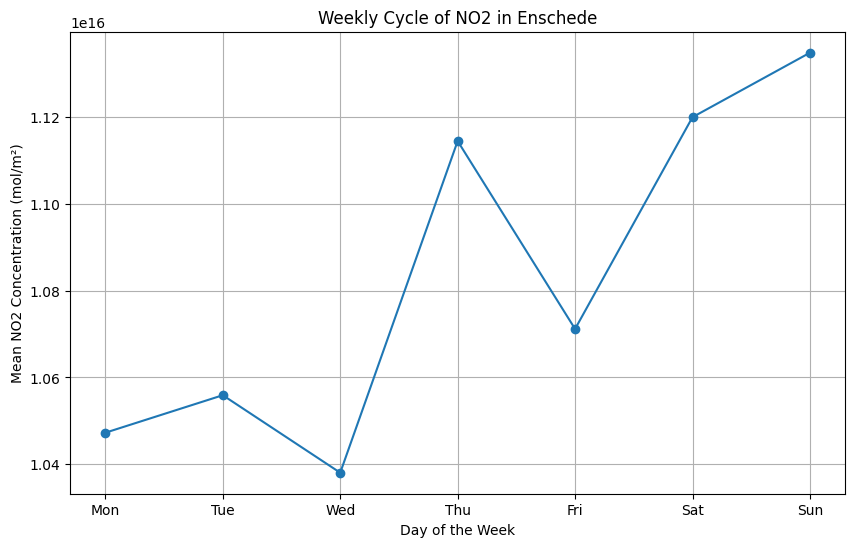

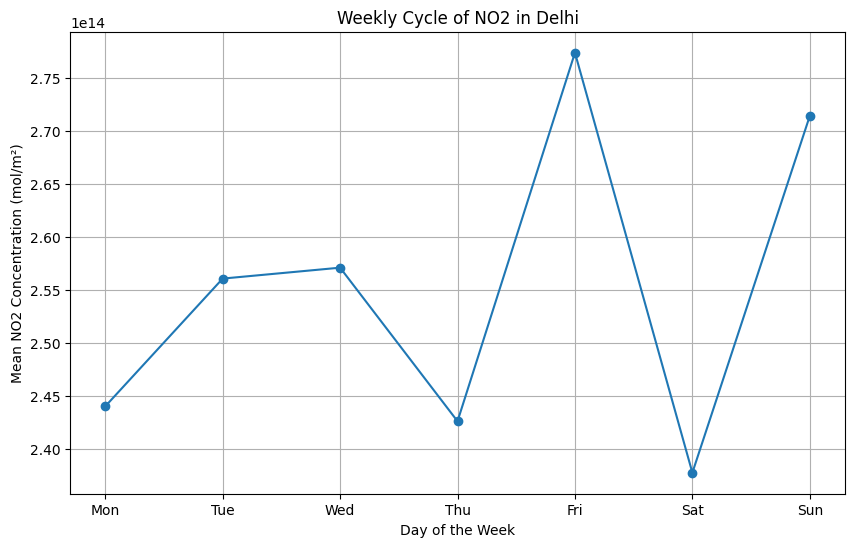

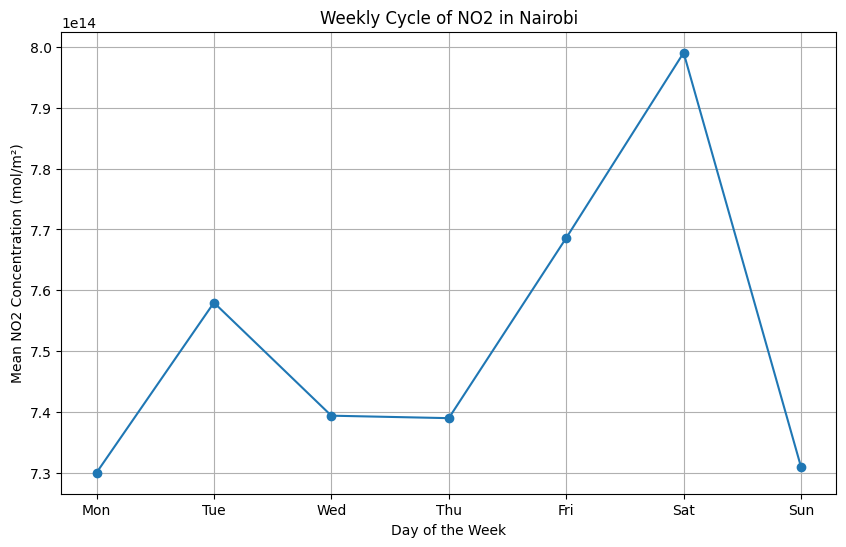

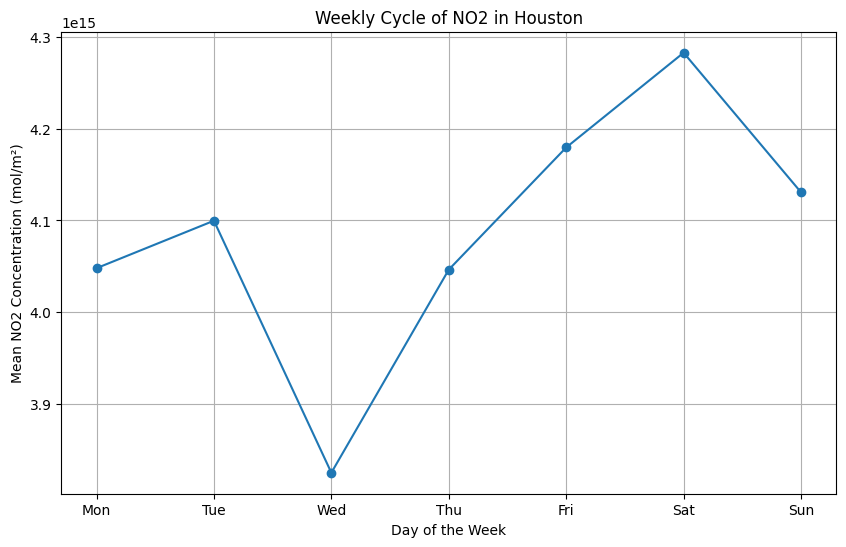

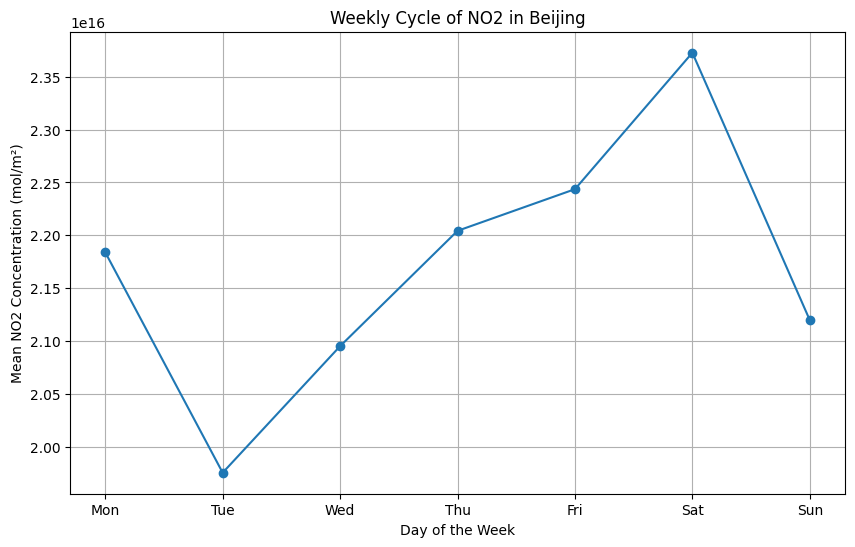

In [60]:
for i in range(len(DataAraay_weekly)):
    # Plot the weekly cycle
    plt.figure(figsize=(10, 6))
    DataAraay_weekly[i].plot(marker='o')
    title = "Weekly Cycle of NO2 in " + Cities[i]
    plt.title(title)
    plt.xlabel('Day of the Week')
    plt.ylabel('Mean NO2 Concentration (mol/m²)')
    plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.grid(True)
    plt.show()

### 5. Analyze the results by considering the following questions:

    a) What are the main sources of NO2 pollution?
    
    
    b) Compare the magnitudes of the NO2 concentrations in the five cities. How do you explain the differences?
    
    c) Is there a long-term linear trend apparent in NO2 data for the five investigated cities? Is the trend positive or negative? What may be the cause of the trend?
    
    d) Is there a seasonal cycle visible in the NO2 data of the different cities? What might it be caused by?
    
    e) Is there a weekly cycle apparent in the NO2 data of the different cities? What can be the cause?

#### a) What are the main sources of NO2 pollution?

NO2 pollution sources can be traced back into two different types of activities. (i) Anthropogenic (ii) Natural. Anthropogenic sources are mostly from transportation, industrial activities and energy production. Where natural sources are mostly from livestocks,vegetation and soils emission and lightening events.
Here for most of our cities, anthropogenic sources are the dominant source of NO2 apart from Enschede, which has larger agricultural sector than others. Thus we assume agricultural sector of enschede has a significant contribution in the overall NO2 pollution.
In Houston and Beijing, vehicle emissions is a significant contributor. Other sources may include industrial processes, power generation, and heating systems.

#### b) Compare the magnitudes of the NO2 concentrations in the five cities. How do you explain the differences?
![Alt text](00_Cities_Given_Locations.png)

For Enschede in the colder seasons we can observe the peaks where for Nairobi the peaks are visible in the other seasons. This is happening because in winter, Enschede uses significant energy for the heating systems which is not necessary for Nairobi. The timeseries of NO2 concentration in Enschede depicts the fall of peaks from late 2015 might resulting for the governments policies regarding no2 emission for agriculture industries and shift towards more cleaner energy sources. The peaks for Nairobi city stayed similar because such strict policy implementation has not been seen.
The coordinate given for New Delhi is not correct, it represents somewhere in the Lakkadep Sea where anthropogenic sources are not predominant. In this time period not much change has happened for that region. Thus marely any change is visible in the timeseries graph.

Beijing has higher peaks but Houston has . The reasons behind these differences can include variations in industrial activities, the implementation and enforcement of environmental regulations, traffic volume and patterns, as well as the cities' responses to specific pollution events. The more pronounced seasonal pattern in Beijing might indicate stronger effects of heating in winter.

#### c) Is there a long-term linear trend apparent in NO2 data for the five investigated cities? Is the trend positive or negative? What may be the cause of the trend?
In the long term from 2004 to 2024, there is a trend of decreasing NO2 levels. The trend is negative. Stricter environmental laws or policies contribute to lower emission and adoption of newer technologies with lower emissions for vehicles and industrial processes has been widespread. Energy transmission and public transportation also cause the decline.

For example, Beijing has imposed traffic restrictions on vehicles with different tail numbers and implemented coal-to-gas conversion policies in recent years. In the U.S., such as the Clean Air Act amendments, have enforced lower emissions standards for vehicles and industries.
As for Enschede drop in trend might be a reflection of government policy implementation of reducing NO2 emissions from agriculture sector and shifting towards more cleaner energy. For location (b), laccadive sea, trend tends to be negative after 2018. Which could be related with El-nino and La-nina events of following years.

#### d) Is there a seasonal cycle visible in the NO2 data of the different cities? What might it be caused by?


Houston and Beijing display clear seasonal patterns, which could be associated with variations in heating use, meteorological conditions, or other seasonal factors that influence NO2 emissions and their dispersion.
Beijing's seasonality pattern appears more pronounced than Houston's, with higher seasonal peaks, which might suggest a stronger influence of seasonal factors such as heating in winter.
Seasonal patterns are also visible for Enschede and Nairobi where seasonal variation for Nairobi is less visible than Enschede. Being more colder and more agriculture oriented city than Nairobi, Enschede posses more sources of NO2 which are most active in certain seasons

#### e) Is there a weekly cycle apparent in the NO2 data of the different cities? What can be the cause?
For Enschede, the weekly cycle does not reflect on working days and holidays. Which is justifiable because significant contribution of NO2 pollution might be coming from natural sources which does not rely on weekly cycle. Being a border city, Enschede is often gets crowded with tourists from nearby regions in weekends. This can also justify higher emission tendency in weekends. City Nairobi depicts lowest emission tendency in Sunday. Being the capital of Kenya, the city is on production mode in weekdays. Thus weekdays shows steady rise in NO2 emission which we assume mostly coming from fuel based transportations in the city and energy productions.
For location (b), Laccadive sea, no appearent weekly cycle is visible. Which is justifiable as most of the NO2 contribution is coming from natural activites, not anthropogenic activities which might follow weekly patterns.

For weekly cycle, Beijing's NO2 levels may be more influenced by industrial activities, which typically reduce during weekends, while Houston's NO2 might be more affected by vehicle traffic, reflecting spikes during weekend leisure travel. Plus, in Beijing, some people work from monday to Saturday, which may also contribute to the continuous rise of NO2 level during work days.

### 6. Summarize your contribution to the group assignment and reflect on how you worked together as a team.

What went well (and would you do the same way next time), and what can be improved? Please use between 100 and 200 words to answer these questions.

In this group assignment, Mahir Tazwar and Xinran Bian combined efforts to finish the tasks together.

The communication and collaboration went quite well. Although we were busy with our own stuff, the only time offline meeting was very efficient, during which we solved most problems in the assignment and had a discussion about the results. Task distribution was handled swiftly, though not perfectly. Given the challenge of analyzing five cities with only two group members, dividing the workload was somewhat tricky. Also, the coding and analysis process went smoothly. However, for the time management, we did most of the work in the last two days before deadline. We should aim to start earlier, allowing for more thorough research and less pressure as the deadline approaches. 

As for the contribution to the group assignment, Mahir did task 1a and 2-5 for first three cities; Xinran Bian did 1b, 2-5 for last two cities and summary of our work. We discussed the patterns and differences between cities.